# **NEXT WORD PREDICTOR**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow

In [3]:
# Importing required libraries and packages
import pandas as pd
import numpy as np
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense,Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
import tensorflow.keras.optimizers as Adam

# Dataset information
## Import Medium-articles-dataset:

This dataset contains information about randomly chosen medium articles published in 2019 from these 7 publications:

Towards Data Science,
UX Collective,
The Startup,
The Writing Cooperative,
Data Driven Investor,
Better Humans,
Better Marketing

In [5]:
medium_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Next word predictor/medium_data.csv')

In [6]:
medium_data.head(5)

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30


In [7]:
medium_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6508 entries, 0 to 6507
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            6508 non-null   int64 
 1   url           6508 non-null   object
 2   title         6508 non-null   object
 3   subtitle      3479 non-null   object
 4   image         6361 non-null   object
 5   claps         6508 non-null   int64 
 6   responses     6508 non-null   object
 7   reading_time  6508 non-null   int64 
 8   publication   6508 non-null   object
 9   date          6508 non-null   object
dtypes: int64(3), object(7)
memory usage: 508.6+ KB


### There are 10 different feilds and 6508 records, But need only 'title' field

In [8]:
print('Number of records: ',medium_data.shape[0])
print('Number of fields: ',medium_data.shape[1])

Number of records:  6508
Number of fields:  10


### Displaying 'title' of various articles and applying preprocessing

In [9]:
medium_data['title']

,title
0,A Beginner’s Guide to Word Embedding with Gens...
1,Hands-on Graph Neural Networks with PyTorch & ...
2,How to Use ggplot2 in Python
3,Databricks: How to Save Files in CSV on Your L...
4,A Step-by-Step Implementation of Gradient Desc...
...,...
6503,“We” vs “I” — How Should You Talk About Yourse...
6504,How Donald Trump Markets Himself
6505,Content and Marketing Beyond Mass Consumption
6506,5 Questions All Copywriters Should Ask Clients...


### Removing unwanted characters and words in titles

In [10]:
# replacing the non-breaking space (\xa0) with a regular space (' ')
medium_data['title']=medium_data['title'].apply(lambda x: x.replace(u'\xa0', u' '))

In [11]:
# replacing a hair space (\u200a) with a regular space (' ').
medium_data['title']=medium_data['title'].apply(lambda x: x.replace('\u200a', ' '))

### Tokenization
 Provide an unique id to all the words and make a word index or we can say vocabulary.

In [12]:
tokenizer = Tokenizer(oov_token='<oov>') # For those words which are not found in word_index
tokenizer.fit_on_texts(medium_data['title'])
total_words = len(tokenizer.word_index) + 1   # vocabulary

print("Total number of words: ", total_words)
print("Word: ID")
print("------------")
print("<oov>: ", tokenizer.word_index['<oov>'])
print("Strong: ", tokenizer.word_index['strong'])
print("And: ", tokenizer.word_index['and'])
print("Consumption: ", tokenizer.word_index['consumption'])

Total number of words:  8238
Word: ID
------------
<oov>:  1
Strong:  4
And:  8
Consumption:  8237


In [13]:
tokenizer.word_index

{'<oov>': 1,
 'to': 2,
 'the': 3,
 'strong': 4,
 'a': 5,
 'of': 6,
 'how': 7,
 'and': 8,
 'in': 9,
 'your': 10,
 'markup': 11,
 'for': 12,
 'you': 13,
 'with': 14,
 'is': 15,
 '—': 16,
 'data': 17,
 'why': 18,
 'class': 19,
 'h3': 20,
 'i': 21,
 'what': 22,
 'on': 23,
 'learning': 24,
 'from': 25,
 'an': 26,
 'be': 27,
 'my': 28,
 'writing': 29,
 'are': 30,
 'it': 31,
 'can': 32,
 'using': 33,
 'design': 34,
 'machine': 35,
 'ux': 36,
 'about': 37,
 'do': 38,
 'not': 39,
 'python': 40,
 'ai': 41,
 'life': 42,
 'that': 43,
 'when': 44,
 'should': 45,
 'we': 46,
 '5': 47,
 'science': 48,
 'make': 49,
 'time': 50,
 'need': 51,
 'as': 52,
 '3': 53,
 'more': 54,
 'at': 55,
 'business': 56,
 'or': 57,
 'part': 58,
 'have': 59,
 'work': 60,
 'new': 61,
 'don’t': 62,
 'up': 63,
 'by': 64,
 'write': 65,
 'get': 66,
 'use': 67,
 'guide': 68,
 'will': 69,
 'marketing': 70,
 '1': 71,
 'ways': 72,
 'deep': 73,
 'best': 74,
 'analysis': 75,
 'first': 76,
 '2019': 77,
 'product': 78,
 'better': 79,
 

##Feature Extraction by N-Grams

In [14]:
input_sequences=[]

for line in medium_data['title']:
  token_list=tokenizer.texts_to_sequences([line])[0]
  # print(token_list)
  for i in range(1,len(token_list)):
    n_gram_sequence=token_list[:i+1]
    input_sequences.append(n_gram_sequence)

print("Total input sequences: ", len(input_sequences))

Total input sequences:  48461


In [15]:
# printing 20 sequences after N-gram
input_sequences[:20]

[[5, 676],
 [5, 676, 68],
 [5, 676, 68, 2],
 [5, 676, 68, 2, 452],
 [5, 676, 68, 2, 452, 1518],
 [5, 676, 68, 2, 452, 1518, 14],
 [5, 676, 68, 2, 452, 1518, 14, 2455],
 [5, 676, 68, 2, 452, 1518, 14, 2455, 3653],
 [5, 676, 68, 2, 452, 1518, 14, 2455, 3653, 99],
 [1858, 23],
 [1858, 23, 741],
 [1858, 23, 741, 81],
 [1858, 23, 741, 81, 103],
 [1858, 23, 741, 81, 103, 14],
 [1858, 23, 741, 81, 103, 14, 345],
 [1858, 23, 741, 81, 103, 14, 345, 345],
 [1858, 23, 741, 81, 103, 14, 345, 345, 1859],
 [7, 2],
 [7, 2, 67],
 [7, 2, 67, 3654]]

### Make all titles with same length by using padding

In [16]:
# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5, 676,
        68], dtype=int32)

In [17]:
max_sequence_len

40

### Prepare features and labels
Here, we consider last element of all sequences as a label.Then, We need to perform onehot encoding on labels corresponding to total_words.

In [18]:
# create features and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [19]:
print(xs[5])
print(labels[5])
print(ys[5][14])

print(xs.shape)
print(ys.shape)

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    5  676   68    2  452 1518]
14
1.0
(48461, 39)
(48461, 8238)


## **Architechture of Bidirectional LSTM Neural Network**

Long Short-Term Memory (LSTM) networks is an advance recurrent neural network which is apable to store order states by using its cell state feature.

Image reference: https://www.researchgate.net/figure/The-structure-of-the-Long-Short-Term-Memory-LSTM-neural-network-Reproduced-from-Yan_fig8_334268507

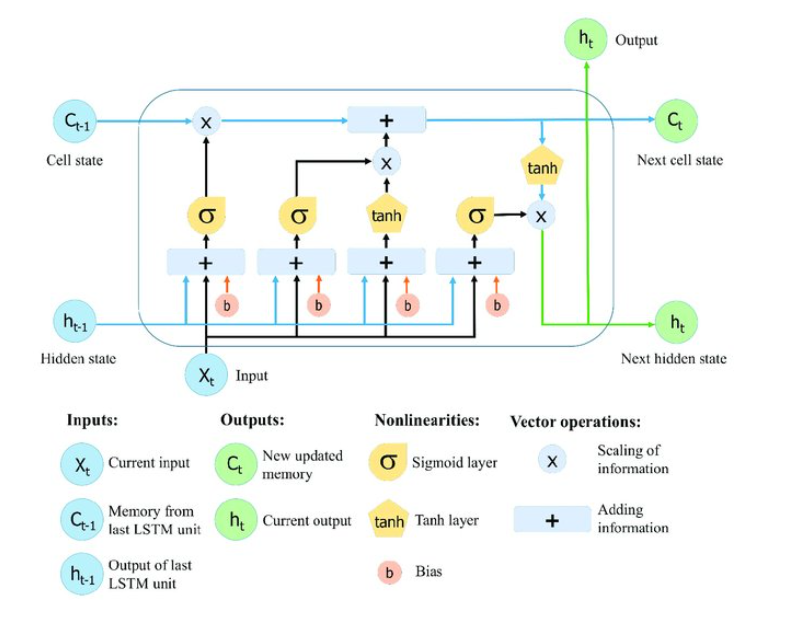

## 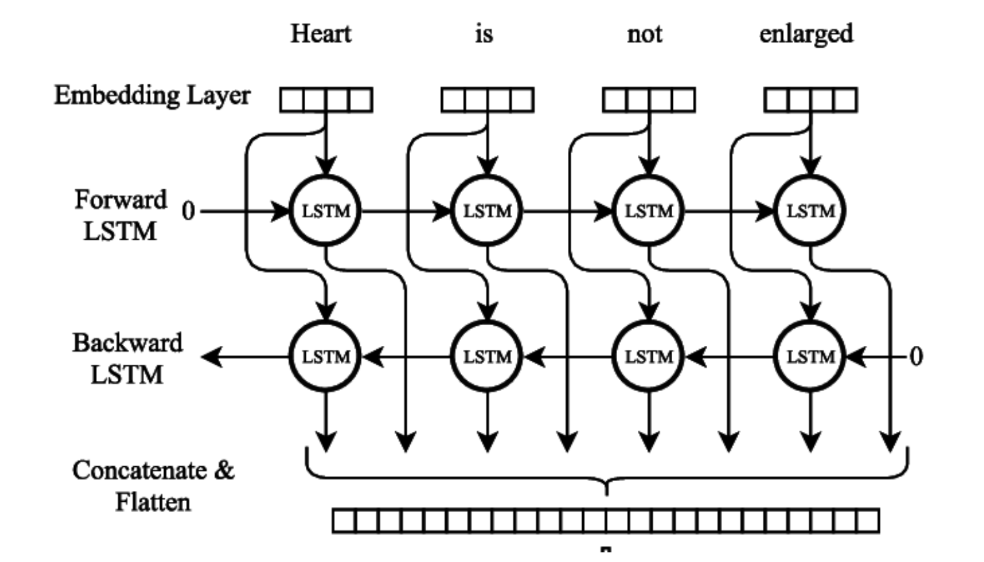Bidirectional LSTM Image reference: https://paperswithcode.com/method/bilstm

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Embedding(total_words, 100))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))

# Fix the optimizer issue
adam = Adam(learning_rate=0.01)

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs=50, verbose=1)

#print model summary
print(model.summary())

Epoch 1/50
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.0970 - loss: 7.0764
Epoch 2/50
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 38s 12ms/step - accuracy: 0.1465 - loss: 7.4688
Epoch 3/50
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.1919 - loss: 5.2199
Epoch 4/50
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.2443 - loss: 4.2654
Epoch 5/50
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.2879 - loss: 3.7517
Epoch 6/50
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.3355 - loss: 3.3586
Epoch 7/50
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.3658 - loss: 3.0998
Epoch 8/50
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.3894 - loss: 2.9444
Epoch 9/50
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.4037 - loss: 2.8515
Epoch 10/50
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.4232 - loss: 2.7129
Epoch 11/50
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.4376 - loss: 2.6275
Epoch 12

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 39, 100)             │         823,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 300)                 │         301,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8238)                │       2,479,638 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,813,916 (41.25 MB)

 Trainable params: 3,604,638 (13.75 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,209,278 (27.50 MB)

None


### Plotting model accuracy and loss

In [27]:
import matplotlib.pyplot as plt



def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

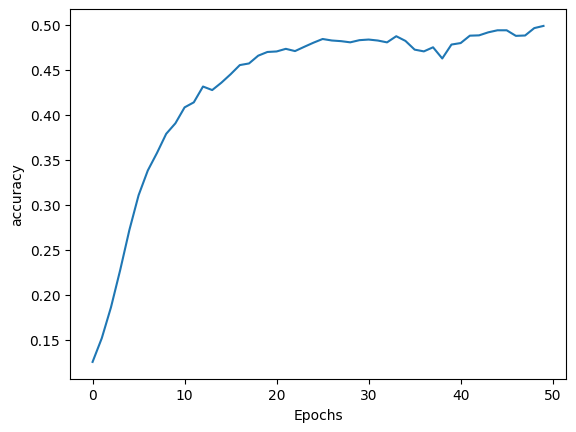

In [29]:
plot_graphs(history,'accuracy')

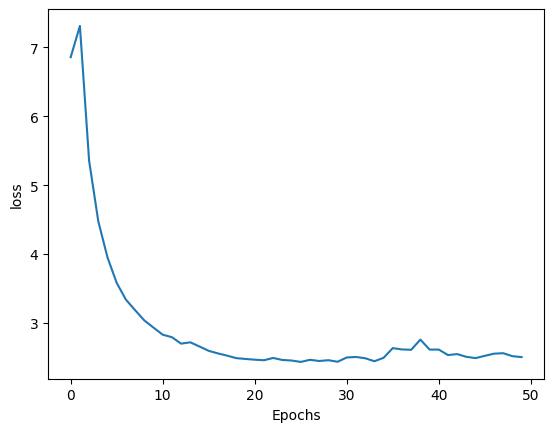

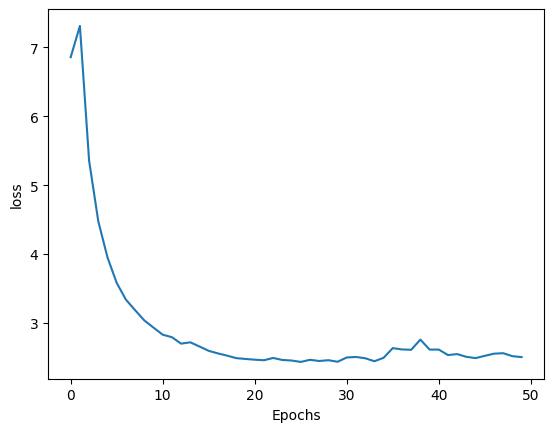

In [30]:
plot_graphs(history, 'loss')

In [35]:
seed_text='implementation of rnn lstm'
next_words=2
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted=model.predict(token_list)
    predicted=np.argmax(predicted,axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
implementation of rnn lstm and gru


In [36]:
import numpy as np

# Get the categorical cross-entropy loss (from model training)
loss = model.evaluate(xs, ys, verbose=0)[0]  # Evaluate on the training data to get loss

# Calculate perplexity
perplexity = np.exp(loss)
print(f'Perplexity: {perplexity}')


Perplexity: 8.204751518614282
